In [38]:
library(doParallel)
detectCores()

Cl = makeCluster(detectCores())
registerDoParallel(Cl)


[1] 4

In [75]:
library(rpart)
library(readr)
library(randomForest)
library(partykit)
library(party)

Warning message:
"package 'party' was built under R version 3.4.4"Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.4.4"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.4.4"
Attaching package: 'party'

The following objects are masked from 'package:partykit':

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal, varimp



In [40]:
set.seed(1234)

In [41]:
df = read_csv("PS_20174392719_1491204439457_log.csv")

Parsed with column specification:
cols(
  step = col_integer(),
  type = col_character(),
  amount = col_double(),
  nameOrig = col_character(),
  oldbalanceOrg = col_double(),
  newbalanceOrig = col_double(),
  nameDest = col_character(),
  oldbalanceDest = col_double(),
  newbalanceDest = col_double(),
  isFraud = col_integer(),
  isFlaggedFraud = col_integer()
)


In [42]:
head(df)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,PAYMENT,9839.64,C1231006815,170136,160296.36,M1979787155,0,0,0,0
1,PAYMENT,1864.28,C1666544295,21249,19384.72,M2044282225,0,0,0,0
1,TRANSFER,181.00,C1305486145,181,0.00,C553264065,0,0,1,0
1,CASH_OUT,181.00,C840083671,181,0.00,C38997010,21182,0,1,0
1,PAYMENT,11668.14,C2048537720,41554,29885.86,M1230701703,0,0,0,0
1,PAYMENT,7817.71,C90045638,53860,46042.29,M573487274,0,0,0,0


In [43]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	6362620 obs. of  11 variables:
 $ step          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ type          : chr  "PAYMENT" "PAYMENT" "TRANSFER" "CASH_OUT" ...
 $ amount        : num  9840 1864 181 181 11668 ...
 $ nameOrig      : chr  "C1231006815" "C1666544295" "C1305486145" "C840083671" ...
 $ oldbalanceOrg : num  170136 21249 181 181 41554 ...
 $ newbalanceOrig: num  160296 19385 0 0 29886 ...
 $ nameDest      : chr  "M1979787155" "M2044282225" "C553264065" "C38997010" ...
 $ oldbalanceDest: num  0 0 0 21182 0 ...
 $ newbalanceDest: num  0 0 0 0 0 ...
 $ isFraud       : int  0 0 1 1 0 0 0 0 0 0 ...
 $ isFlaggedFraud: int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 11
  .. ..$ step          : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ type          : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ amount        : list()
  .. .. ..- attr(*, "clas

In [44]:
df$step = as.factor(df$step)
df$type = as.factor(df$type)

In [45]:
length(unique(df$step))

[1] 743

In [46]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	6362620 obs. of  11 variables:
 $ step          : Factor w/ 743 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ type          : Factor w/ 5 levels "CASH_IN","CASH_OUT",..: 4 4 5 2 4 4 4 4 4 3 ...
 $ amount        : num  9840 1864 181 181 11668 ...
 $ nameOrig      : chr  "C1231006815" "C1666544295" "C1305486145" "C840083671" ...
 $ oldbalanceOrg : num  170136 21249 181 181 41554 ...
 $ newbalanceOrig: num  160296 19385 0 0 29886 ...
 $ nameDest      : chr  "M1979787155" "M2044282225" "C553264065" "C38997010" ...
 $ oldbalanceDest: num  0 0 0 21182 0 ...
 $ newbalanceDest: num  0 0 0 0 0 ...
 $ isFraud       : int  0 0 1 1 0 0 0 0 0 0 ...
 $ isFlaggedFraud: int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 11
  .. ..$ step          : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ type          : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  ..

In [47]:
ind = sample(nrow(df), nrow(df)*0.8)
train = df[ind,]
test = df[-ind,]

In [48]:
head(train)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
37,CASH_OUT,983.59,C1334804256,489917.6,488934.04,C1938080088,355242.34,175887.8,0,0
289,PAYMENT,363.52,C1365801376,20386.0,20022.48,M109021280,0.00,0.0,0,0
283,PAYMENT,8233.51,C1199502829,245465.2,237231.72,M886617520,0.00,0.0,0,0
297,CASH_IN,376319.75,C126039227,1731196.9,2107516.61,C185657352,614420.34,238100.6,0,0
379,CASH_IN,65198.24,C1547557217,9003.0,74201.24,C639937992,85404.94,20206.7,0,0
301,PAYMENT,1478.42,C1611951671,104530.4,103051.95,M394396781,0.00,0.0,0,0


In [49]:
nrow(train[,c(1,3,5,6,8,9)])

[1] 5090096

In [50]:
nrow(train[,2])

[1] 5090096

mtry = 2  OOB error = 5.88% 
Searching left ...
mtry = 1 	OOB error = 6.68% 
-0.1359633 0.05 
Searching right ...
mtry = 4 	OOB error = 6.16% 
-0.04782244 0.05 


,mtry,OOBError
1.OOB,1,0.06682664
2.OOB,2,0.05882816
4.OOB,4,0.06164147


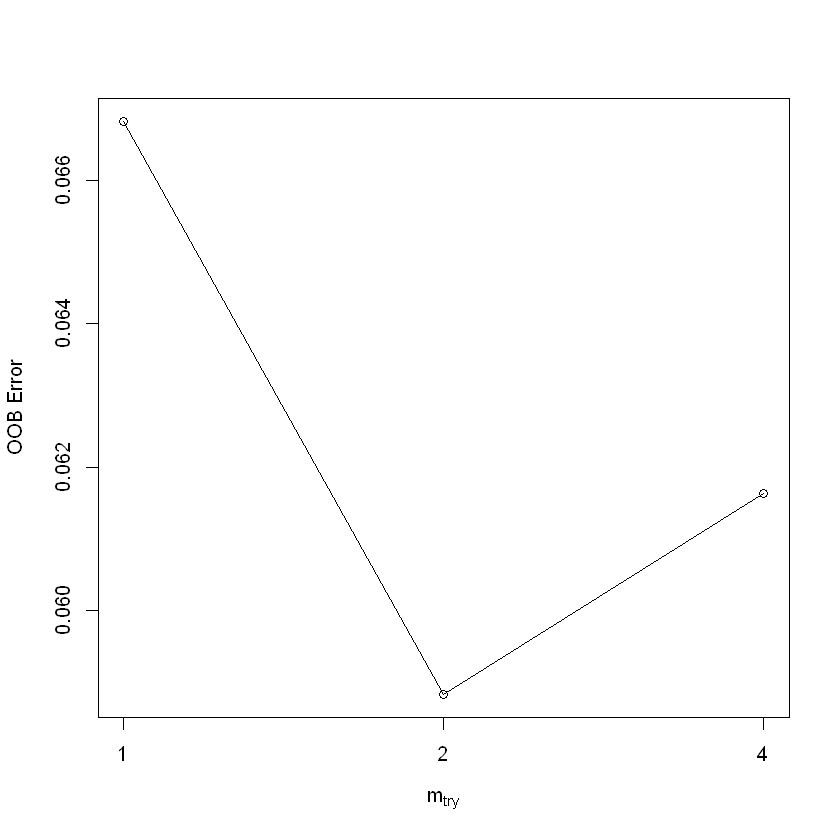

In [33]:
tuneRF(train[,c(3,5:6,8:9)],train$type)

In [61]:
memory.limit(size=NA)

[1] 16309

In [87]:
rf = randomForest(type~amount+oldbalanceOrg+newbalanceOrig+oldbalanceDest+newbalanceDest, data=train[1:250000, ],  mtry = 2, importance = T)

In [88]:
rf


Call:
 randomForest(formula = type ~ amount + oldbalanceOrg + newbalanceOrig +      oldbalanceDest + newbalanceDest, data = train[1:250000, ],      mtry = 2, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5.93%
Confusion matrix:
         CASH_IN CASH_OUT DEBIT PAYMENT TRANSFER  class.error
CASH_IN    54898       57   127     434        0 0.0111319259
CASH_OUT     153    85556   478      50     1391 0.0236454101
DEBIT         50      816   729       0        3 0.5438047559
PAYMENT       13        5     0   84365        1 0.0002251612
TRANSFER      10    11156    32      40     9636 0.5383730957

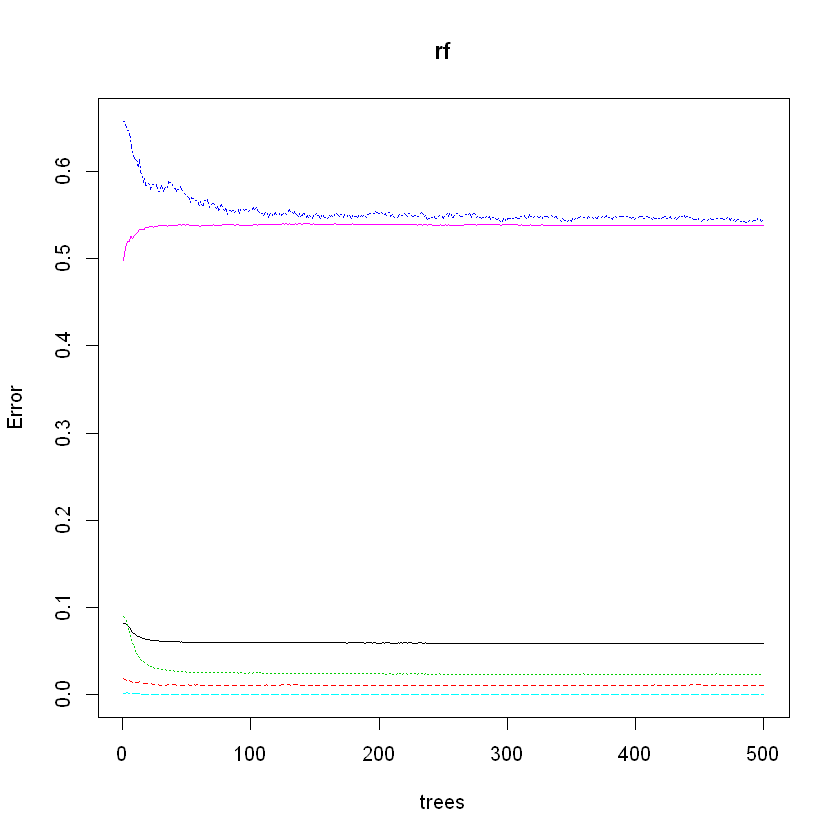

In [89]:
plot(rf)

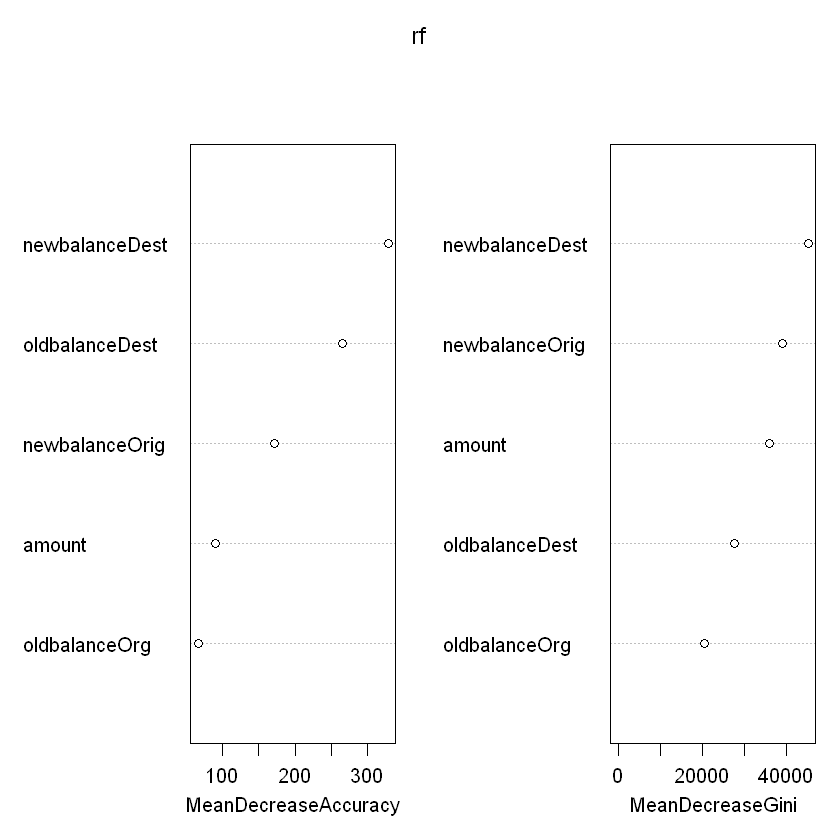

In [90]:
varImpPlot(rf)

In [94]:
print(importance(rf))

                 CASH_IN  CASH_OUT     DEBIT   PAYMENT   TRANSFER
amount          67.65242 141.35566 191.90669  53.04562 377.811374
oldbalanceOrg  114.62649  85.20576  70.26454  37.13659  19.366893
newbalanceOrig 481.71954 323.23041  33.72734  39.86912  68.404359
oldbalanceDest  90.87881  35.99778  64.69672 415.57084  -2.941133
newbalanceDest  23.54406  62.62748  17.27616 402.81404  26.980810
               MeanDecreaseAccuracy MeanDecreaseGini
amount                     90.50890         35890.20
oldbalanceOrg              66.65655         20366.53
newbalanceOrig            171.36576         38980.51
oldbalanceDest            265.57721         27735.84
newbalanceDest            328.71766         45259.94


In [72]:
d_tree = rpart(type~amount+oldbalanceOrg+newbalanceOrig+oldbalanceDest+newbalanceDest, data=train)
d_tree

n= 5090096 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 5090096 3299698 CASH_OUT (0.22 0.35 0.0065 0.34 0.084)  
   2) newbalanceDest>=0.005 3138922 1357649 CASH_OUT (0.29 0.57 0.01 0 0.13)  
     4) newbalanceOrig>=68750.54 989127  123176 CASH_IN (0.88 0.11 0.0079 0 0.0099) *
     5) newbalanceOrig< 68750.54 2149795  474080 CASH_OUT (0.017 0.78 0.012 0 0.19)  
      10) amount< 543709.6 1929716  280488 CASH_OUT (0.019 0.85 0.013 0 0.11) *
      11) amount>=543709.6 220079   26488 TRANSFER (0 0.12 4.5e-06 0 0.88) *
   3) newbalanceDest< 0.005 1951174  230194 PAYMENT (0.11 0.0047 0.0002 0.88 0.0021)  
     6) amount>=66955.29 199233   18724 CASH_IN (0.91 0.028 5e-06 0.049 0.017) *
     7) amount< 66955.29 1751941   40707 PAYMENT (0.021 0.002 0.00022 0.98 0.00042) *

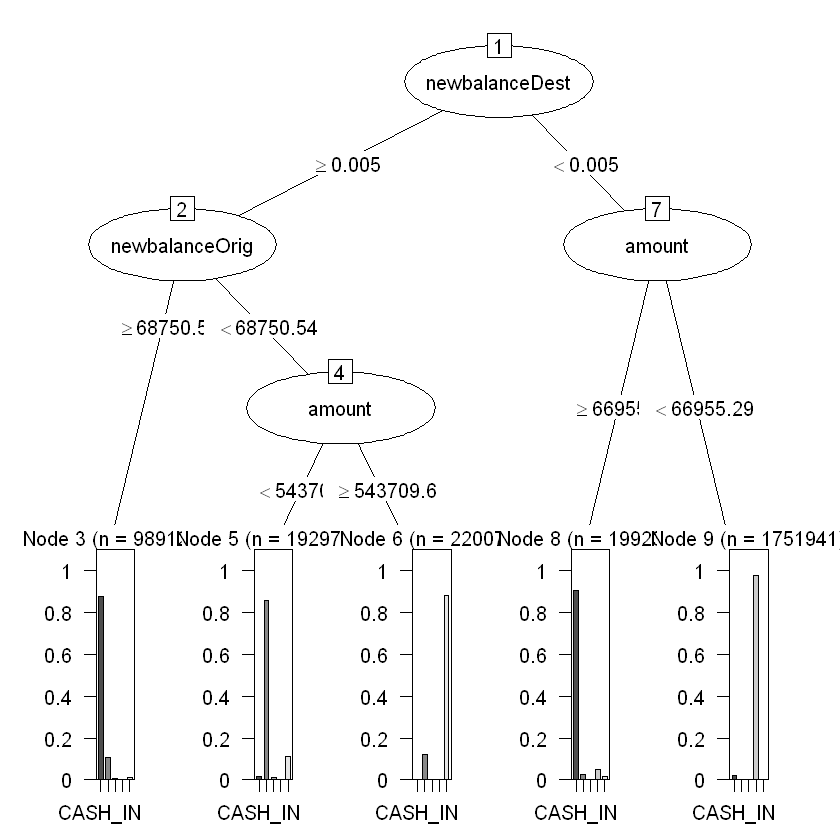

In [73]:
plot(as.party(d_tree))

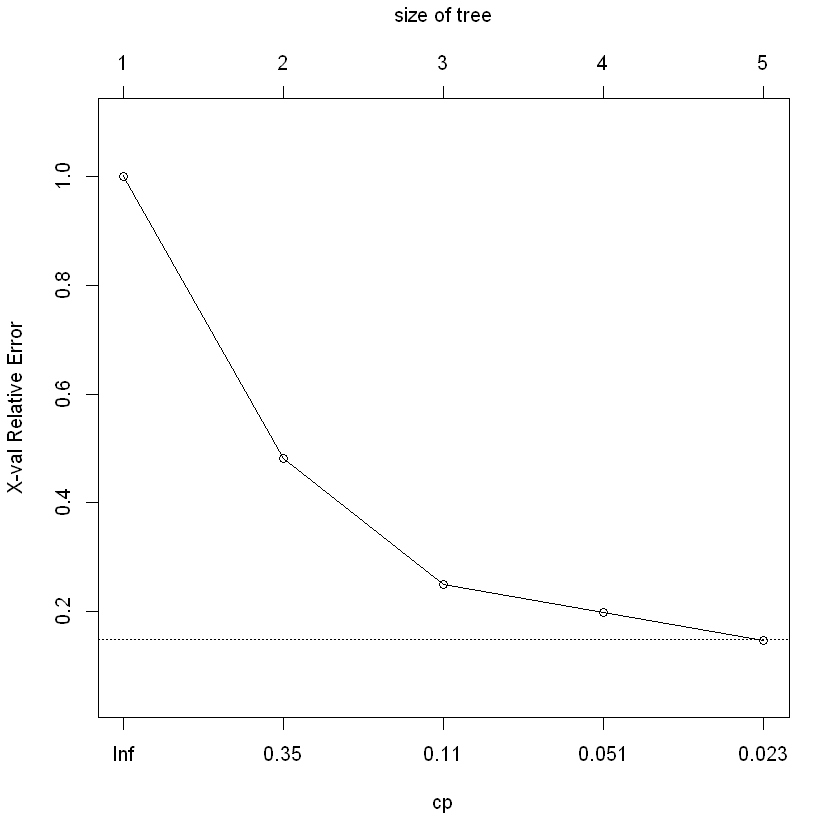

In [99]:
plotcp(d_tree)

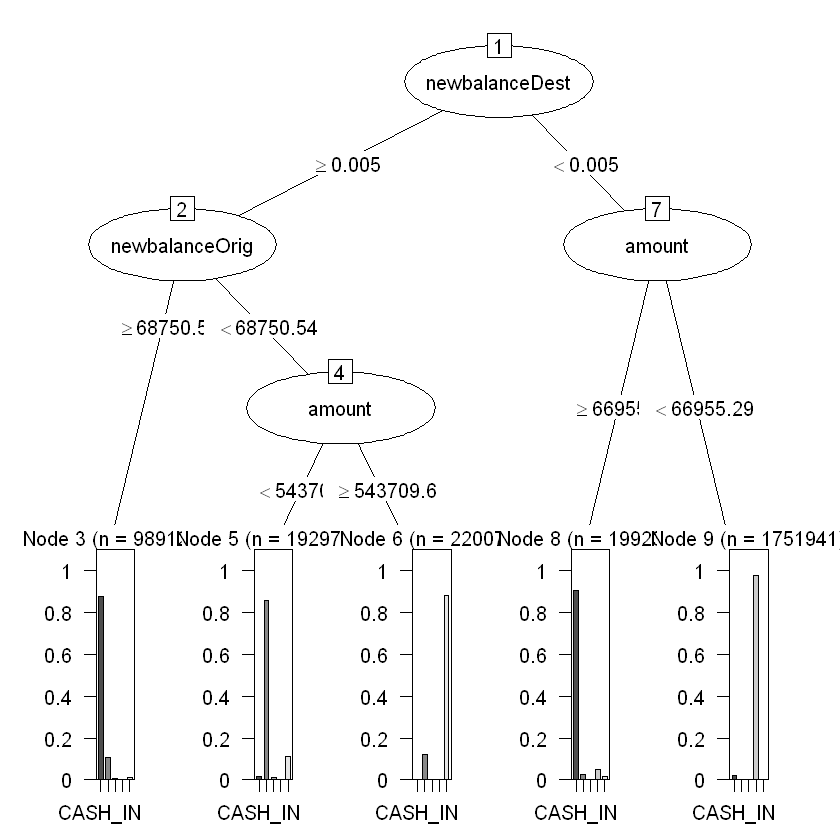

In [100]:
d_tree1 = prune(d_tree, cp=0.023)
plot(as.party(d_tree1))
#上記はベストなものであった

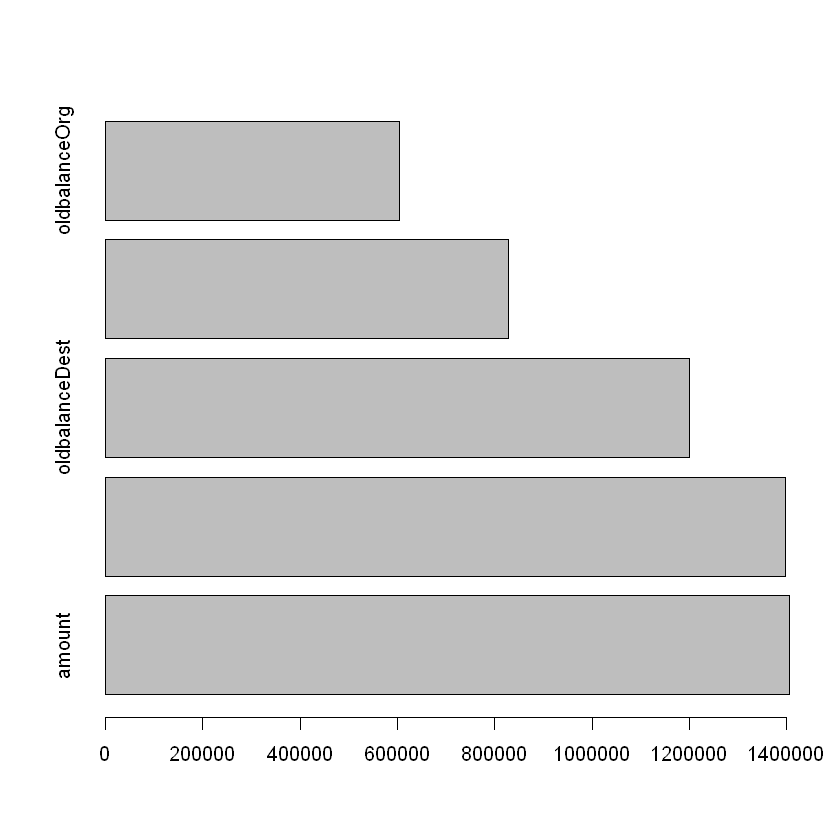

In [104]:
#重要変数の表示
barplot(d_tree1$variable.importance, horiz=T)

## 別の手法で試す

In [80]:
d_tree2 = ctree(type~amount+oldbalanceOrg+newbalanceOrig+oldbalanceDest+newbalanceDest, data=train, controls = ctree_control(maxdepth = 3))

In [82]:
d_tree2


	 Conditional inference tree with 8 terminal nodes

Response:  type 
Inputs:  amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest 
Number of observations:  5090096 

1) newbalanceOrig <= 113770.9; criterion = 1, statistic = 1416646.294
  2) newbalanceOrig <= 31582.38; criterion = 1, statistic = 948362.318
    3) amount <= 39124.84; criterion = 1, statistic = 487536.375
      4)*  weights = 1385633 
    3) amount > 39124.84
      5)*  weights = 1914942 
  2) newbalanceOrig > 31582.38
    6) oldbalanceOrg <= 33173; criterion = 1, statistic = 190253.374
      7)*  weights = 74741 
    6) oldbalanceOrg > 33173
      8)*  weights = 345997 
1) newbalanceOrig > 113770.9
  9) amount <= 28934.85; criterion = 1, statistic = 257734.891
    10) newbalanceOrig <= 1013142; criterion = 1, statistic = 133209.379
      11)*  weights = 277950 
    10) newbalanceOrig > 1013142
      12)*  weights = 65930 
  9) amount > 28934.85
    13) newbalanceOrig <= 863981.7; criterion = 1, statist

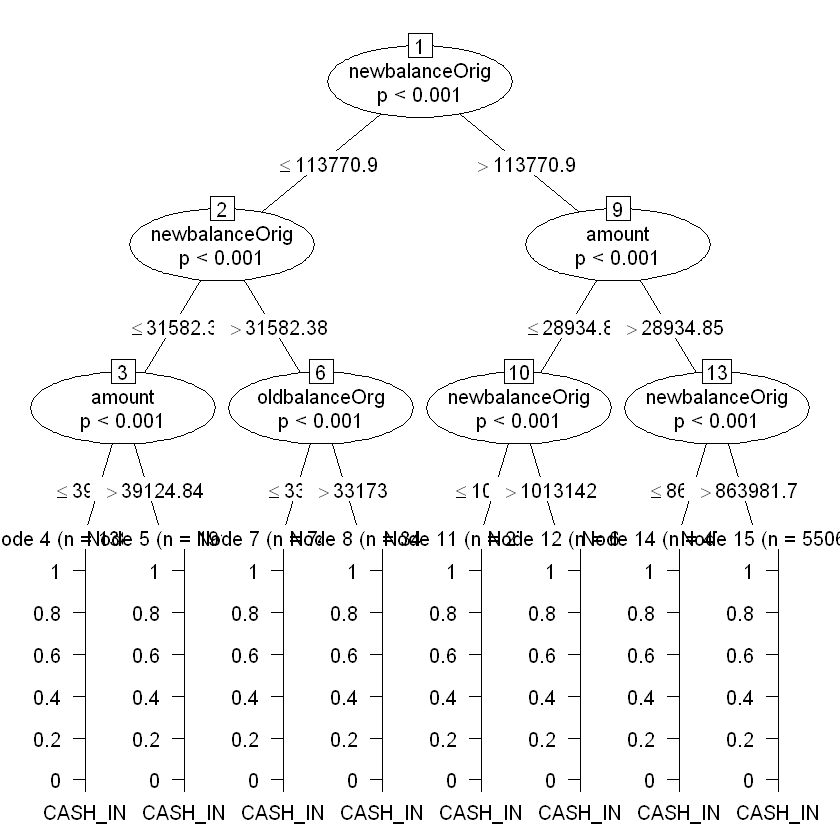

In [81]:
plot(d_tree2)